In [23]:
from project_paths import *

import pandas as pd
import numpy as np
import math
import matplotlib
from matplotlib import pylab as plt

#### We analyze the target variable

In [47]:
# read the data
df = pd.read_csv(working_data_csv)
print("Row count:", df.shape[0], "Column count:", df.shape[1])

# Creating some dictionaries for ease of visualization
nunique_dict = {c:df[c].nunique() for c in df.columns}
desc_dict = pd.read_csv(features_list).set_index("features").to_dict()["descriptions"]

Row count: 39644 Column count: 61


In [48]:
var = 'shares'

print("Variable:", var)
print("Data description:", desc_dict[var])
print("Unique value count:", df[var].nunique())
print("Feature Describe:")
print(df[var].describe())


Variable: shares
Data description: Number of shares (target)
Unique value count: 1454
Feature Describe:
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


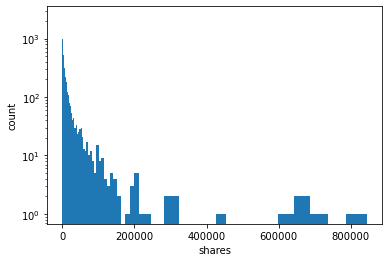

In [49]:
df[var].plot.hist(log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df[var])),200))
plt.xlabel(var)
plt.ylabel('count')
plt.show()

We can see that the distribution of the number of shares is **highly non-linear**. 
Most articles have relatively few shares, but some are extreme outliers. 

To convert this into a classification task, we must **find an appropriate cutoff for the number of shares beyond which we will call the articles 'popular'**. 
We can do this by trying different thresholds and seeing how it splits the dataset.

In [50]:
def view_threshold_breakdown(var_col):
    print(var_col.value_counts())
    pd.value_counts(var_col, normalize=True).plot.bar()
    plt.ylabel('fraction')
    plt.show()

In [51]:
thresholds = np.logspace(start=1, stop=math.ceil(np.log10(df[var].max())), num=10, endpoint=True, base=10.0)

10.0
1    39640
0        4
Name: shares, dtype: int64


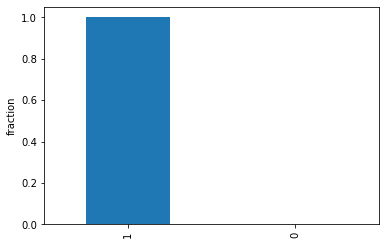

35.938136638046274
1    39634
0       10
Name: shares, dtype: int64


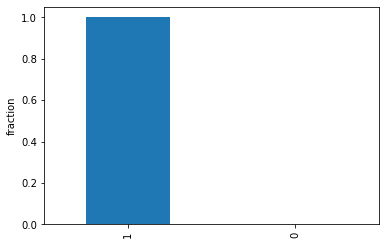

129.1549665014884
1    39530
0      114
Name: shares, dtype: int64


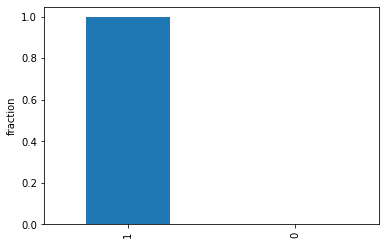

464.1588833612782
1    38842
0      802
Name: shares, dtype: int64


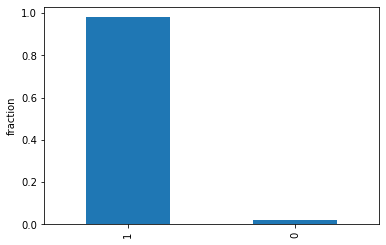

1668.100537200059
0    22542
1    17102
Name: shares, dtype: int64


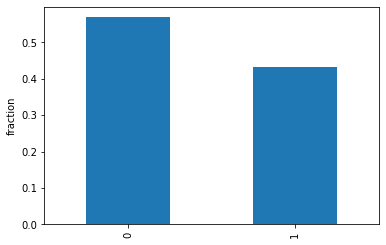

5994.8425031894085
0    35453
1     4191
Name: shares, dtype: int64


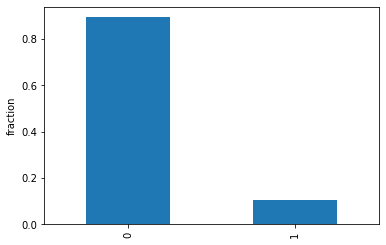

21544.346900318866
0    38912
1      732
Name: shares, dtype: int64


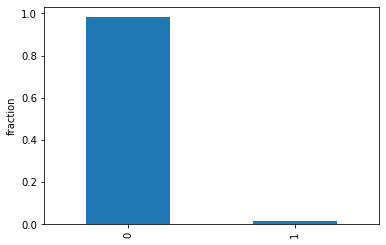

77426.36826811278
0    39551
1       93
Name: shares, dtype: int64


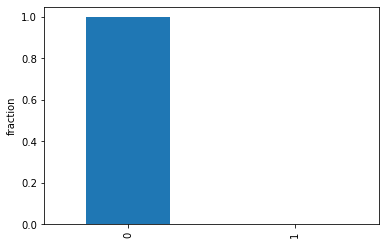

278255.94022071257
0    39634
1       10
Name: shares, dtype: int64


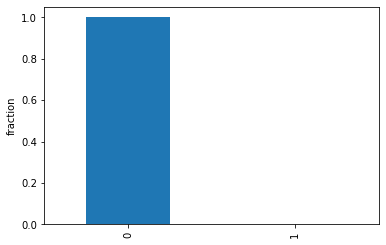

1000000.0
0    39644
Name: shares, dtype: int64


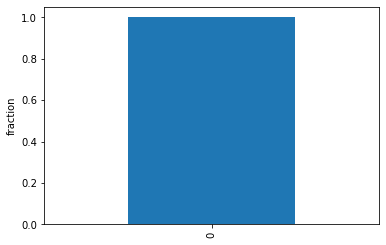

In [52]:
for threshold in thresholds:
    # We classify all values above threshold as 1, and all values <= threshold as 0
    print(threshold)
    data = df[var].copy()
    data.loc[data <= threshold] = 0
    data.loc[data > threshold] = 1
    view_threshold_breakdown(data)

In [46]:
df[var]

0        0
1        0
2        0
3        0
4        0
        ..
39639    0
39640    0
39641    0
39642    0
39643    0
Name: shares, Length: 39644, dtype: int64